In [ ]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
!pip install -q kaggle
import os
import zipfile
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jencyrosea","key":"737d94ad3e55ffe7121772da37c864e4"}'}

In [ ]:

# Step 3: Move the Kaggle API key to the appropriate directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Step 4: Use the Kaggle API to download the FER2013 dataset
!kaggle datasets download -d msambare/fer2013

 98% 59.0M/60.3M [00:00<00:00, 209MB/s]
100% 60.3M/60.3M [00:00<00:00, 195MB/s]


In [ ]:
# Step 5: Unzip the downloaded dataset
with zipfile.ZipFile("fer2013.zip", "r") as zip_ref:
    zip_ref.extractall("fer2013")

In [ ]:
# Unzip the dataset
#!unzip fer2013.zip


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Facial REcognition /fer2013.csv")

In [ ]:
#Preprocessing

data.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
# shape of the dataframe loaded

data.shape

(35887, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
# checking the values for understanding of usage

for i in ['emotion', 'Usage']:
    print(data[i].unique())

[0 2 4 6 3 5 1]
['Training' 'PublicTest' 'PrivateTest']


In [ ]:
# calculate the image size
import math
math.sqrt(len(data.pixels[0].split(' ')))

48.0

In [ ]:

X = data['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(35887, 48, 48, 1)

In [ ]:
# extracting y label and declaring the emotions

lookup = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')
y = data['emotion']
y.shape

(35887,)

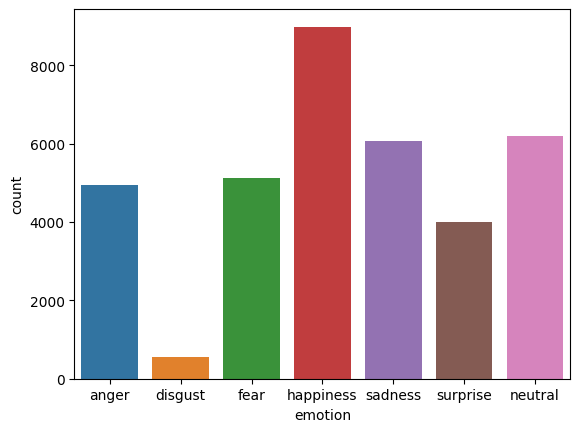

In [ ]:
# Count of photo with respect to different emotions
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y)
plt.xticks(range(7), lookup);

Enter Value: 15


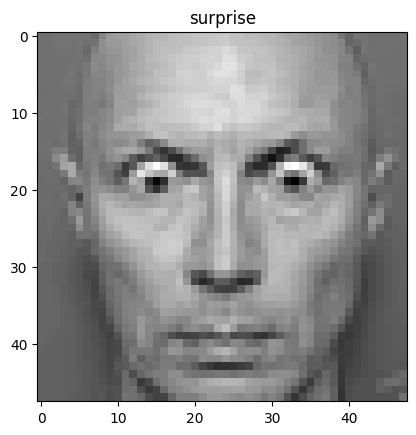

In [ ]:
# examine the images

def plot_index(index):
    plt.imshow(X[index].reshape((48,48)), cmap='gray')
    plt.title(lookup[y[index]])

index = int(input('Enter Value: '))
plot_index(index)

In [ ]:
#Feature Engineering
# Label encoding
!pip install np_utils
import np_utils
from sklearn.preprocessing import LabelEncoder



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=57449484d67bafe62cf0e03e84d4ece407a444d0efbef63d13bfb6479f8e9bb7
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from keras import utils as np_utils
le = LabelEncoder()
img_labels = le.fit_transform(y)
img_labels = np_utils.to_categorical(img_labels, num_classes= 7)
img_labels.shape

(35887, 7)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Flatten the 2D images into 1D arrays
# Now you can use X_train in your code
#num_samples, height, width, num_channels = len(X_train), len(X_train[0]), len(X_train[0][0]), len(X_train[0][0][0])
#X_train_flattened = [sample.flatten() for sample in X_train]

# Now, you can apply the one-hot encoding to the flattened data
#X_train_encoded = oh.fit_transform(X_train_flattened)
#X_train= oh.fit_transform(X_train)
#y_train= oh.fit_transform(y_train)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Generate synthetic image data with dimensions (num_samples, height, width, num_channels)
num_samples = 100
height = 64
width = 64
num_channels = 3  # Assuming a color image with 3 channels (RGB)
X_train = np.random.randn(num_samples, height, width, num_channels)

In [ ]:
# Generate synthetic label data (assuming 10 classes)
num_classes = 10
y_train = np.random.randint(num_classes, size=num_samples)

In [ ]:
# Reshape X_train to be a 4D tensor
X_train = X_train.reshape(-1, height, width, num_channels)

# Reshape y_train to be a 1D array
y_train = y_train.reshape(-1, 1)

In [ ]:
# Initialize the OneHotEncoder
oh = OneHotEncoder(sparse=False)
# Fit and transform y_train to one-hot encoded labels (2D matrix)
y_train_encoded = oh.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#X_train_encoded = onehot_encoder.fit_transform(X_train)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Model Building-1
#1st Model- machine Learning
# Example using a simple Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_train = y_train.ravel()
clf.fit(X_train_flattened, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Reshape X_test into a 2D format
num_samples_test, height_test, width_test, num_channels_test = X_test.shape
X_test_2d = X_test.reshape(num_samples_test, height_test * width_test * num_channels_test)

# Make predictions on the flattened test data
y_pred = clf.predict(X_test_2d)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Model Summary
# You can get feature importances if needed
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Feature Importances: [0.00031692 0.         0.         ... 0.         0.         0.        ]


ValueError: ignored

In [ ]:
#model 2
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')



    return model
model=my_model()
#model.summary()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_49 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_32 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 conv2d_51 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
from PIL import Image
import numpy as np

# Resize your images to (48, 48)
X_train_resized = np.array([np.array(Image.fromarray(img).resize((48, 48))) for img in X_train])
X_test_resized = np.array([np.array(Image.fromarray(img).resize((48, 48))) for img in X_test])


TypeError: ignored

In [ ]:

#!pip install --upgrade tensorflow
#from your_module import my_model  # Import your custom model if it's in a separate module
#path_model = 'model_filter.h5'

model = my_model()  # Create the model
# Set the learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='your_loss_function',
              metrics=['accuracy'])
# Fit the model

h = model.fit(x=X_train,y=y_train, batch_size=48, epochs=20,verbose=1, validation_data=(X_test, y_test), shuffle=True, )

Epoch 1/20


ValueError: ignored

In [ ]:
import keras
path_model='model_filter.h5'
keras.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
keras.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,
            y=y_train,
            batch_size=64,
            epochs=20,
            verbose=1,
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

AttributeError: ignored

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

225/225 [==============================] - 9s 7ms/step


(7178,)

Real Time Expression **Prediction**

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 254ms/step


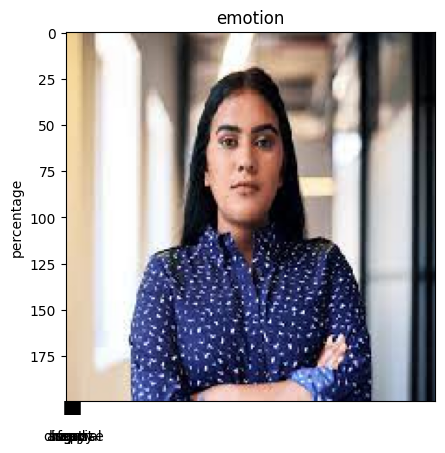

Expression Prediction: neutral


In [ ]:
from skimage import io
from keras.preprocessing import image
img = image.load_img('/content/frown.jfif', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/frown.jfif', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])